[View in Colaboratory](https://colab.research.google.com/github/kmanicka/CarND-Traffic-Sign-Classifier-Project/blob/master/Udacity_Term_1_Traffic_Sign_Classifier.ipynb)

# **Self-Driving Car Engineer Nanodegree**

## Project: Build a Traffic Sign Recognition Classifier


The model uses an Convolution Neural Nework architecture similar to LeNet. 



### Download data and Unzip

In [1]:
#Download German Traffic Data Set

!echo log > log.txt
!rm -rf *.p *.zip *.csv internet_images >> log.txt 2>&1
!wget https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip >>log.txt 2>&1
!wget https://raw.githubusercontent.com/kmanicka/CarND-Traffic-Sign-Classifier-Project/master/signnames.csv >>log.txt 2>&1
!wget https://raw.githubusercontent.com/kmanicka/CarND-Traffic-Sign-Classifier-Project/master/internet_images.zip >>log.txt 2>&1

!unzip traffic-signs-data.zip >>log.txt 2>&1
!unzip internet_images.zip >>log.txt 2>&1

!ls
!ls internet_images

datalab		     log.txt	    traffic-signs-data.zip
internet_images      signnames.csv  train.p
internet_images.zip  test.p	    valid.p
00.jpg	01.jpg	02.jpg	03.jpg	04.jpg	05.jpg	06.jpg	07.jpg	08.jpg	09.jpg


### Load and Prepare Data

In [7]:
import pickle
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline


print('===============================================')
#Training files 

training_file   = 'train.p' 
validation_file = 'valid.p' 
testing_file    = 'test.p'

print('training file name = ', training_file)
print('validation file name = ', validation_file)
print('testing file name = ', testing_file)


print('===============================================')
#Load Data

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


print("Shape of X_train =", X_train.shape)
print("Shape of X_test =", X_test.shape)
print("Shape of X_valid =", X_valid.shape)

print("Shape of Y_train =", y_train.shape)
print("Shape of Y_test =", y_test.shape)
print("Shape of Y_valid =", y_valid.shape)


print('===============================================')
#Extract Constants

n_train = X_train.shape[0]
n_validation = X_valid.shape[0]
n_test = X_test.shape[0]
image_shape = X_train[0].shape
n_classes = len(np.unique(y_test))


print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)


print('===============================================')
#Pre Process Input Images 


X_train_normalized = (X_train - 128.) / 128. 
X_valid_normalized = (X_valid - 128.) / 128. 
X_test_normalized = (X_test - 128.) / 128. 
print("Sample X_train")
print(X_train[0,0,0,:])
print("Sample X_train_normalized")
print(X_train_normalized[0,0,0,:])


print('===============================================')
#Convert labels to one hot.

y_train_one_hot = to_categorical(y_train, n_classes)
y_valid_one_hot = to_categorical(y_valid, n_classes)
y_test_one_hot = to_categorical(y_test, n_classes)

print("Shape of y_train_one_hot =", y_train_one_hot.shape)
print("Shape of y_valid_one_hot =", y_valid_one_hot.shape)
print("Shape of y_test_one_hot =", y_test_one_hot.shape)


training file name =  train.p
validation file name =  valid.p
testing file name =  test.p
Shape of X_train = (34799, 32, 32, 3)
Shape of X_test = (12630, 32, 32, 3)
Shape of X_valid = (4410, 32, 32, 3)
Shape of Y_train = (34799,)
Shape of Y_test = (12630,)
Shape of Y_valid = (4410,)
Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43
Sample X_train
[28 25 24]
Sample X_train_normalized
[-0.78125   -0.8046875 -0.8125   ]
Shape of y_train_one_hot = (34799, 43)
Shape of y_valid_one_hot = (4410, 43)
Shape of y_test_one_hot = (12630, 43)


### Analyze Data

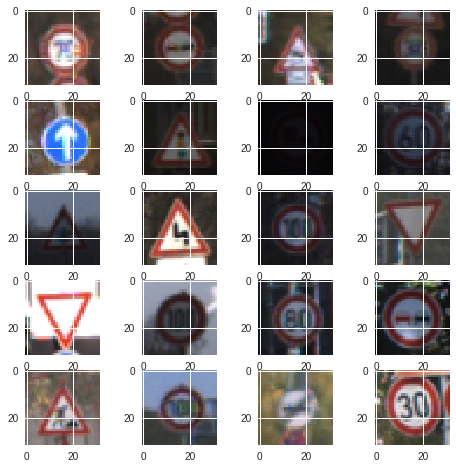

In [8]:
# view random samples 

fig=plt.figure(figsize=(8, 8))
columns,rows = 4,5
for i in range(1,columns*rows + 1):
  fig.add_subplot(rows, columns, i)
  plt.imshow(X_train[np.random.randint(n_train)])

(array([2640., 1680., 2250., 1350.,  900.,  930.,  480.,  690.,  690.,
        1020.]),
 array([ 0. ,  4.2,  8.4, 12.6, 16.8, 21. , 25.2, 29.4, 33.6, 37.8, 42. ]),
 <a list of 10 Patch objects>)

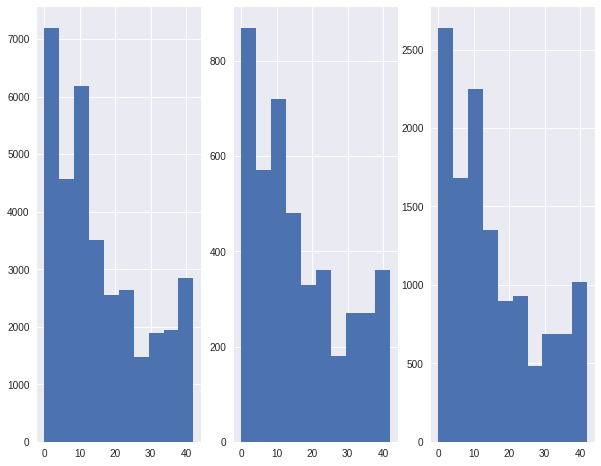

In [9]:
#Analyze distribution of the Images per class


fig=plt.figure(figsize=(10, 8))
columns,rows = 3,1
fig.add_subplot(rows, columns, 1)
plt.hist(y_train)
fig.add_subplot(rows, columns, 2)
plt.hist(y_valid)
fig.add_subplot(rows, columns, 3)
plt.hist(y_test)

### Build, Train and Evaluate Model 


#####################################################################
 Model Summary
#####################################################################
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
activation_2 (Activation)    (None, 10, 10, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)       

34799/34799 [==============================] - 6s 160us/step - loss: 2.4223 - acc: 0.3539 - val_loss: 0.8980 - val_acc: 0.7551
Epoch 2/20
34799/34799 [==============================] - 4s 112us/step - loss: 0.7314 - acc: 0.7774 - val_loss: 0.3276 - val_acc: 0.9034
Epoch 3/20
34799/34799 [==============================] - 4s 112us/step - loss: 0.3217 - acc: 0.9028 - val_loss: 0.1678 - val_acc: 0.9587
Epoch 4/20
34799/34799 [==============================] - 4s 113us/step - loss: 0.2019 - acc: 0.9407 - val_loss: 0.1378 - val_acc: 0.9619
Epoch 5/20
16640/34799 [=============>................] - ETA: 1s - loss: 0.1488 - acc: 0.9563

34799/34799 [==============================] - 4s 112us/step - loss: 0.1404 - acc: 0.9593 - val_loss: 0.1552 - val_acc: 0.9546
Epoch 6/20
34799/34799 [==============================] - 4s 115us/step - loss: 0.1094 - acc: 0.9688 - val_loss: 0.1212 - val_acc: 0.9621
Epoch 7/20
34799/34799 [==============================] - 4s 114us/step - loss: 0.0866 - acc: 0.9749 - val_loss: 0.1338 - val_acc: 0.9626
Epoch 8/20
34799/34799 [==============================] - 4s 114us/step - loss: 0.0704 - acc: 0.9788 - val_loss: 0.1052 - val_acc: 0.9683
Epoch 9/20
16640/34799 [=============>................] - ETA: 1s - loss: 0.0589 - acc: 0.9831

34799/34799 [==============================] - 4s 112us/step - loss: 0.0623 - acc: 0.9824 - val_loss: 0.0960 - val_acc: 0.9705
Epoch 10/20
34799/34799 [==============================] - 4s 114us/step - loss: 0.0523 - acc: 0.9851 - val_loss: 0.1168 - val_acc: 0.9687
Epoch 11/20
34799/34799 [==============================] - 4s 112us/step - loss: 0.0467 - acc: 0.9863 - val_loss: 0.0913 - val_acc: 0.9735
Epoch 12/20
34799/34799 [==============================] - 4s 114us/step - loss: 0.0441 - acc: 0.9877 - val_loss: 0.0911 - val_acc: 0.9748
Epoch 13/20
15616/34799 [============>.................] - ETA: 2s - loss: 0.0372 - acc: 0.9896

34799/34799 [==============================] - 4s 115us/step - loss: 0.0388 - acc: 0.9887 - val_loss: 0.0961 - val_acc: 0.9739
Epoch 14/20
34799/34799 [==============================] - 4s 113us/step - loss: 0.0352 - acc: 0.9900 - val_loss: 0.1159 - val_acc: 0.9717
Epoch 15/20
34799/34799 [==============================] - 4s 114us/step - loss: 0.0297 - acc: 0.9911 - val_loss: 0.1276 - val_acc: 0.9671
Epoch 16/20
34799/34799 [==============================] - 4s 114us/step - loss: 0.0270 - acc: 0.9921 - val_loss: 0.1104 - val_acc: 0.9726
Epoch 17/20
16128/34799 [============>.................] - ETA: 2s - loss: 0.0272 - acc: 0.9923

34799/34799 [==============================] - 4s 113us/step - loss: 0.0245 - acc: 0.9931 - val_loss: 0.0773 - val_acc: 0.9782
Epoch 18/20
34799/34799 [==============================] - 4s 113us/step - loss: 0.0257 - acc: 0.9928 - val_loss: 0.1123 - val_acc: 0.9703
Epoch 19/20
34799/34799 [==============================] - 4s 113us/step - loss: 0.0207 - acc: 0.9940 - val_loss: 0.1248 - val_acc: 0.9730
Epoch 20/20
34799/34799 [==============================] - 4s 113us/step - loss: 0.0228 - acc: 0.9938 - val_loss: 0.0907 - val_acc: 0.9778

#####################################################################
 Training History
#####################################################################
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
[0.8979794146522643, 0.32756200920697515, 0.16775849670374474, 0.13776427013820666, 0.15520102163257243, 0.12121471100890177, 0.13375639897557884, 0.10521475763863708, 0.09603520086343462, 0.11679219560633791, 0.09128376791077347, 0.09105886247794

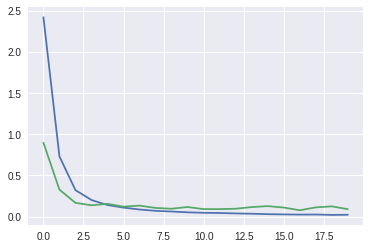


#####################################################################
 Evaluating Model
#####################################################################
12630/12630 [==============================] - 2s 127us/step

#####################################################################
Test loss: 0.16739877317036092
Test accuracy: 0.9654790182294868
#####################################################################


In [16]:
import os.path
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam, Adadelta


def LeNet(input_shape,classes, weights_path=None) :
  
  model = Sequential()

  #Layer 1 
  model.add(Conv2D(32, (5, 5), padding="valid",input_shape=input_shape))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

  #Layer 2
  model.add(Conv2D(64, (5, 5), padding="valid"))
  model.add(Activation("relu"))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  #Layer 3
  model.add(Dense(800))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))
  
  #Layer 4
  model.add(Dense(128))
  model.add(Activation("relu"))
  model.add(Dropout(0.5))

  #Layer 5
  model.add(Dense(classes))
  model.add(Activation("softmax"))

  if weights_path != None :
    if os.path.isfile(weights_path) :
      model.load_weights(weights_path)            

  model.compile(loss=categorical_crossentropy,
              optimizer=Adadelta(),
              metrics=['accuracy'])
  
  return model

model = LeNet(image_shape,n_classes)

print()
print('#####################################################################')
print(' Model Summary')
print('#####################################################################')


model.summary()


print()
print('#####################################################################')
print(' Training Parameters')
print('#####################################################################')

batch_size = 256 
epochs = 20 
weights_file = 'weightsv1.h5'

print('batch_size ' + str(batch_size))
print('epochs ' + str(epochs))
print('weights_file ' + weights_file)

              
print()
print('#####################################################################')
print(' Training Model')
print('#####################################################################')

history = model.fit(X_train_normalized, y_train_one_hot,
                batch_size=batch_size,
                epochs=epochs,
                verbose=1,
                validation_data=(X_valid_normalized, y_valid_one_hot))

model.save_weights(weights_file)

print()
print('#####################################################################')
print(' Training History')
print('#####################################################################')


print(history.history.keys())
print(history.history['val_loss'])


train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['acc']
val_acc    = history.history['val_acc']
xc         = range(epochs)

plt.figure()
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.show()


print()
print('#####################################################################')
print(' Evaluating Model')
print('#####################################################################')


score = model.evaluate(X_test_normalized, y_test_one_hot, verbose=1)


print()
print('#####################################################################')
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('#####################################################################')


In [17]:
!ls


datalab		     log.txt	    traffic-signs-data.zip  weightsv1.h5
internet_images      signnames.csv  train.p
internet_images.zip  test.p	    valid.p


### Test Images Predictions

Make prediction on some of the randomly selected test images 


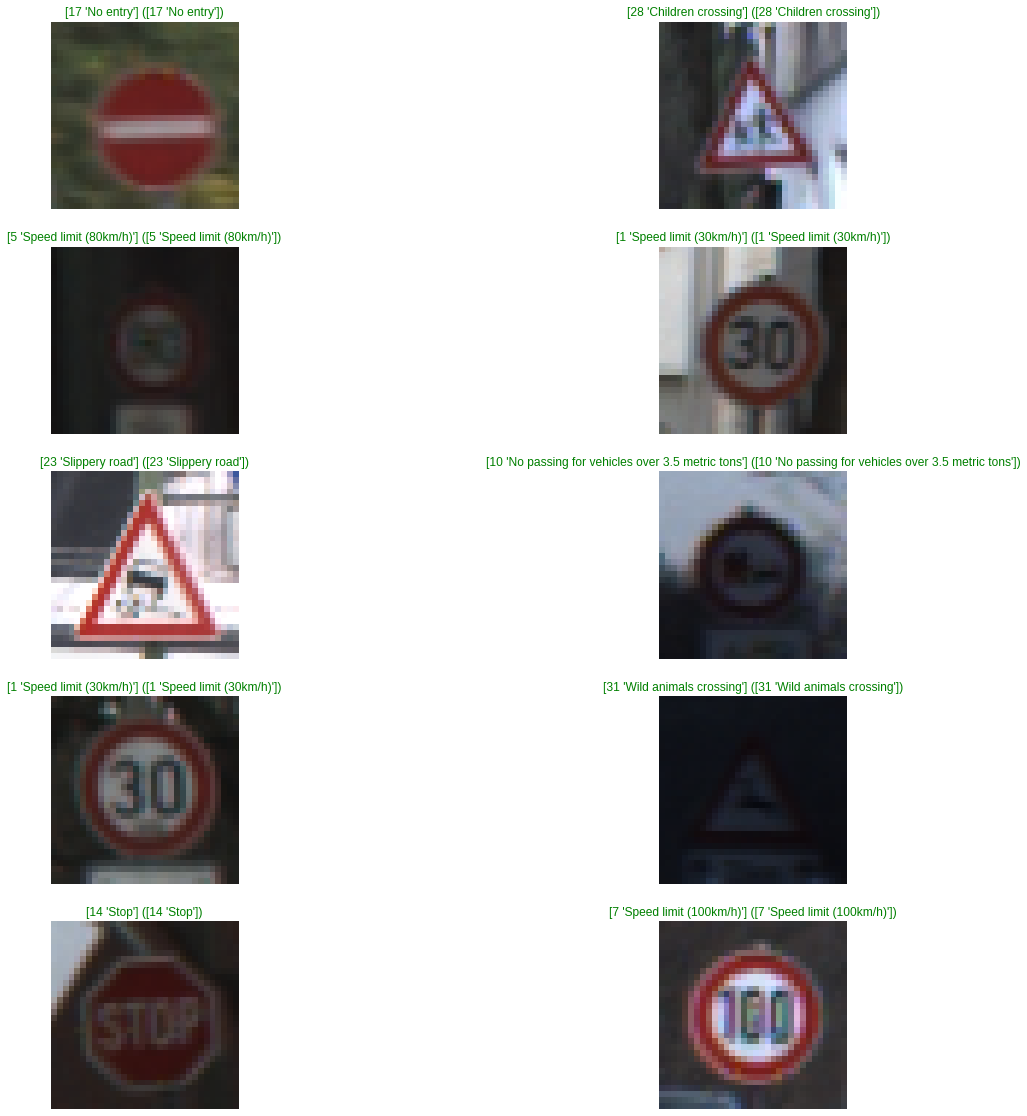

In [19]:
# View Predictions for random test images 

from pandas import read_csv
german_traffic_signs = read_csv('signnames.csv').values

loaded_model = LeNet(image_shape,n_classes, weights_path = weights_file)
y_hat = loaded_model.predict(X_test_normalized)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 20))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=10, replace=False)):
    ax = figure.add_subplot(5, 2, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test_one_hot[index])
    # Set the title for each image
    #ax.set_title("{} ({})".format(predict_index,true_index))
    
    ax.set_title("{} ({})".format(german_traffic_signs[predict_index], 
                                  german_traffic_signs[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

### Predictions on Random images downloaded from Internet

The imges were croped and resized to (32,32,0)  

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


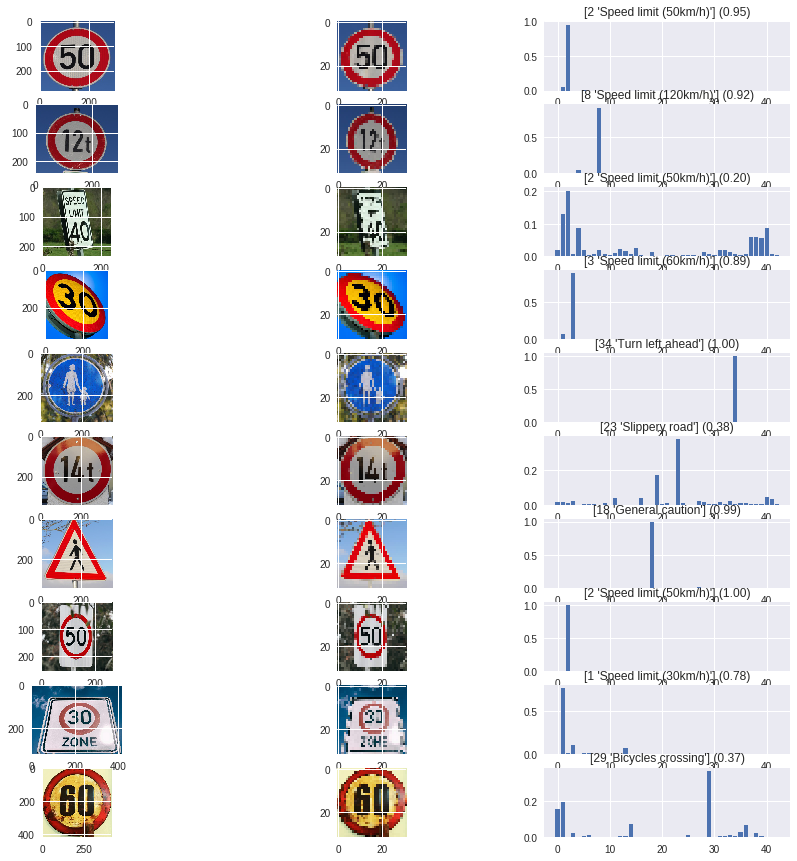

In [31]:

from skimage.io import imread_collection
from skimage.transform import resize

raw_images = imread_collection('internet_images/*')
figure = plt.figure(figsize=(15, 15))
i=0
row=len(raw_images)
col=3

loaded_model = LeNet(image_shape,n_classes, weights_path = weights_file)

for raw_image in raw_images :
  
    #prepare image
    image = resize(raw_image,(32,32,3))
    x = np.asarray( image, dtype="int32" )
    x = image.reshape(1,x.shape[0],x.shape[1],x.shape[2])
    
    
    y_hat = loaded_model.predict(x)
    predict_index = np.argmax(y_hat[0])
    predicted_probablity = y_hat[0,predict_index]
    
    i=i+1
    ax = figure.add_subplot(row, col, i)
    ax.imshow(raw_image)

    i=i+1
    ax = figure.add_subplot(row, col, i)
    ax.imshow(image)
    
    i=i+1
    ax = figure.add_subplot(row, col, i)
    ax.set_title("{} ({:0.2f})".format(german_traffic_signs[predict_index],predicted_probablity))
    ax.bar(range(n_classes),y_hat[0])

